In [108]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import os
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score,f1_score,roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.pipeline import Pipeline


In [113]:
# Primer modelo - Regresion Logistica
def RegresionLogistica(X_train, X_test, y_train, y_test):
    lr = LogisticRegression(penalty='l2',C=1.0,
                                    solver='liblinear')
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    #matrix = confusion_matrix(y_test, pred)
    ac = accuracy_score(y_test, pred, normalize=True)
    print("Acuracy: ", ac)
    print(classification_report(y_true=y_test,y_pred=pred))
    
    ConfusionMatrixDisplay.from_predictions(y_test,pred)
    #graficar_matrix_confusion(matrix)


def summarize_classification(y_test, y_pred):
    
    acc = accuracy_score(y_test, y_pred, normalize=True)
    prec = precision_score(y_test, y_pred,average=None)
    recall = recall_score(y_test, y_pred, average= None)
    f1 = f1_score(y_test, y_pred, average=None)

    
    return {'accuracy': acc, 
            'precision': prec,
            'recall':recall,
            'f1':f1
            }


def build_model(classifier_fn,                
                dataset: pd.DataFrame, 
                test_frac:float =0.2)-> dict:
    """
    Funcion para entrenar un modelo de clasificacion
    
    Args:
        classifier_fn: funcion de clasificacion
        name_of_y_col (list): nombre de la columna objetivo
        names_of_x_cols (list): lista de nombres de las columnas de caracteristicas
        dataset (pd.Dataframe): dataframe con los datos
        test_frac (float): fraccion de datos para el test, por defecto 0.2
        
    Returns:
        dict: diccionario con las metricas de desempeño del modelo en train y test  
    
    """
    
    # separar las columnas de caracteristicas y la columna objetivo

    Y = dataset.Grupo
    X =  dataset.drop(["Grupo"],axis=1)

    # dividir los datos en train y test
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_frac, random_state = 123, shuffle=True, stratify=Y)
    
    # crear el pipeline con el modelo de clasificacion
    classifier_pipe = Pipeline(steps=[("model", classifier_fn)])
    
    # entrenar el pipeline del clasificador   
    model = classifier_pipe.fit(x_train, y_train)
    
    # predecir los datos de test
    y_pred = model.predict(x_test)

    # predecir los datos de train
    y_pred_train = model.predict(x_train)
    
    # calcular las metricas de desempeño
    train_summary = summarize_classification(y_train, y_pred_train)
    test_summary = summarize_classification(y_test, y_pred)
    
    # guardar las metricas de desempeño en un dataframe
    pred_results = pd.DataFrame({'y_test': y_test,
                                 'y_pred': y_pred})
    
    # calcular la matriz de confusion
    model_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)
    
    return {'train': train_summary, 
            'test': test_summary,
            'confusion_matrix': model_crosstab}


In [114]:
# Lectura del dataset
df = pd.read_csv("Final_dataset_join.csv")

In [115]:
# Clasificación de los grupos.
df.Grupo.value_counts()

1    264
2    260
3    235
Name: Grupo, dtype: int64

In [116]:
df.shape

(759, 175)

In [69]:
# Se definen las variables dependientes | variables independientes
'''
data_target = df.Grupo
data_features = df.drop(["Grupo"],axis=1)
# Division del conjunto de datos (70% training , 30% testing)
x_train, x_test, y_train, y_test = train_test_split(data_features, data_target,  train_size = 0.80, test_size = 0.20, random_state = 123, shuffle=True, stratify=data_target)
print("Conjunto de Entrenamiento Variables Independientes: ", x_train.shape)
print("Conjunto de Entrenamiento Variables Dependiente: ", y_train.shape)
print("Conjunto de Test Variables Independientes: ", x_test.shape)
print("Conjunto de Test Variables Dependientes: ", y_test.shape)
'''

'\ndata_target = df.Grupo\ndata_features = df.drop(["Grupo"],axis=1)\n# Division del conjunto de datos (70% training , 30% testing)\nx_train, x_test, y_train, y_test = train_test_split(data_features, data_target,  train_size = 0.80, test_size = 0.20, random_state = 123, shuffle=True, stratify=data_target)\nprint("Conjunto de Entrenamiento Variables Independientes: ", x_train.shape)\nprint("Conjunto de Entrenamiento Variables Dependiente: ", y_train.shape)\nprint("Conjunto de Test Variables Independientes: ", x_test.shape)\nprint("Conjunto de Test Variables Dependientes: ", y_test.shape)\n'

## REGRESIÓN LOGISTICA

In [117]:
result_dict = {}
result_dict['logistic'] = build_model(LogisticRegression(solver='liblinear'),df)
result_dict['logistic'] 


{'train': {'accuracy': 0.4332784184514003,
  'precision': array([0.44036697, 0.43290043, 0.42405063]),
  'recall': array([0.4549763 , 0.48076923, 0.35638298]),
  'f1': array([0.44755245, 0.45558087, 0.38728324])},
 'test': {'accuracy': 0.32894736842105265,
  'precision': array([0.34782609, 0.34782609, 0.27027027]),
  'recall': array([0.30188679, 0.46153846, 0.21276596]),
  'f1': array([0.32323232, 0.39669421, 0.23809524])},
 'confusion_matrix': y_test   1   2   3
 y_pred            
 1       16  18  12
 2       20  24  25
 3       17  10  10}

## Lineal Discriminant Analysis

In [75]:
result_dict['linear_discriminant_analysis'] = build_model(LinearDiscriminantAnalysis(solver='svd'),df)
result_dict['linear_discriminant_analysis']


{'train': {'accuracy': 0.6144975288303131,
  'precision': 0.6144975288303131,
  'recall': 0.6144975288303131,
  'f1': 0.6144975288303131},
 'test': {'accuracy': 0.28289473684210525,
  'precision': 0.28289473684210525,
  'recall': 0.28289473684210525,
  'f1': 0.28289473684210525},
 'confusion_matrix': y_test   0   1   2   3
 y_pred                
 0       20   9  13  13
 1        7   1   5   7
 2        5   4   7   9
 3       17  10  10  15}

## SGD

In [76]:
result_dict['sgd'] = build_model(SGDClassifier(max_iter=1000,tol=1e-3),df)
result_dict['sgd']


{'train': {'accuracy': 0.15980230642504117,
  'precision': 0.15980230642504117,
  'recall': 0.15980230642504117,
  'f1': 0.15980230642504117},
 'test': {'accuracy': 0.15789473684210525,
  'precision': 0.15789473684210525,
  'recall': 0.15789473684210525,
  'f1': 0.15789473684210525},
 'confusion_matrix': y_test   0   1   2   3
 y_pred                
 1       49  24  35  44}

## SVC Lineal

In [77]:
result_dict['linear_svc'] = build_model(LinearSVC(C=1.0,
                                                   max_iter=1000,
                                                   tol=1e-3,
                                                   dual=False),df)

result_dict['linear_svc']


{'train': {'accuracy': 0.36902800658978585,
  'precision': 0.36902800658978585,
  'recall': 0.36902800658978585,
  'f1': 0.36902800658978585},
 'test': {'accuracy': 0.3355263157894737,
  'precision': 0.3355263157894737,
  'recall': 0.3355263157894737,
  'f1': 0.3355263157894737},
 'confusion_matrix': y_test   0   1   2   3
 y_pred                
 0       32   9  17  25
 2        4   3   3   3
 3       13  12  15  16}

## Radius Neighbors Classifier

In [78]:
result_dict['radius_neighbors'] = build_model(RadiusNeighborsClassifier(radius=40.0),df)
result_dict['radius_neighbors']


ValueError: No neighbors found for test samples array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151], dtype=int64), you can try using larger radius, giving a label for outliers, or considering removing them from your dataset.

## Decision Tree classifier

In [79]:
result_dict['decision_tree'] = build_model(DecisionTreeClassifier(),df)

result_dict['decision_tree']


{'train': {'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0},
 'test': {'accuracy': 0.28289473684210525,
  'precision': 0.28289473684210525,
  'recall': 0.28289473684210525,
  'f1': 0.28289473684210525},
 'confusion_matrix': y_test   0   1   2   3
 y_pred                
 0       19   4   5   9
 1        7   2   9   9
 2       10   8  12  16
 3       13  10   9  10}

## Naive Bayes

In [80]:
result_dict['naive_bayes'] = build_model(GaussianNB(),

                                         df)

result_dict['naive_bayes']


{'train': {'accuracy': 0.24052718286655683,
  'precision': 0.24052718286655683,
  'recall': 0.24052718286655683,
  'f1': 0.24052718286655683},
 'test': {'accuracy': 0.2236842105263158,
  'precision': 0.2236842105263158,
  'recall': 0.2236842105263158,
  'f1': 0.2236842105263158},
 'confusion_matrix': y_test   0   1   2   3
 y_pred                
 0        6   2   0   4
 1       41  21  32  35
 2        1   1   2   0
 3        1   0   1   5}

## Comparación de modelos

In [81]:
# Crear un diccionario solo con los resultados de prueba de cada modelo
nombre_modelos = result_dict.keys()
resultados_train = {} # crear diccionario vacio
resultados_test = {} # crear diccionario vacio
for nombre in nombre_modelos:
    resultados_train[nombre] = result_dict[nombre]['train']['f1']
    resultados_test[nombre] = result_dict[nombre]['test']['f1']

df_comparacion = pd.DataFrame([resultados_train, resultados_test], index=['train', 'test'])


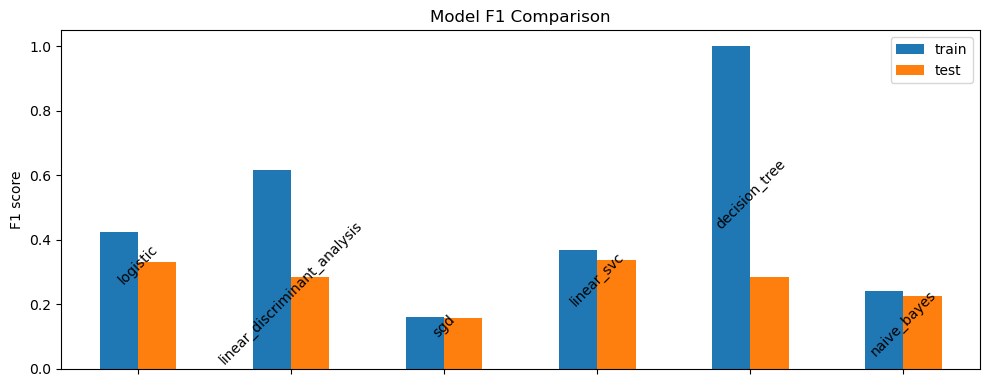

In [82]:
# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 4))
df_comparacion.T.plot(kind='bar', ax=ax)

# Adjust the layout
ax.set_ylabel('F1 score')
ax.set_title('Model F1 Comparison')

# Set the x-tick labels inside the bars and rotate by 90 degrees
ax.set_xticks(range(len(df_comparacion.columns)))
ax.set_xticklabels([])

# Draw the x-tick labels inside the bars rotated by 90 degrees
for i, label in enumerate(df_comparacion.columns):
    bar_center = (df_comparacion.loc['train', label] +
                  df_comparacion.loc['test', label]) / 2
    ax.text(i, bar_center, label, ha='center',
            va='center_baseline', rotation=45)

plt.tight_layout()
